In [9]:
sc

In [21]:
# imports
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import datetime
import csv

In [14]:
taxi_aug14 = sc.textFile('../taxi_aug14_200k.csv'   , use_unicode=False).filter(lambda x: x != "").cache()
uber_aug14 = sc.textFile('../uber-raw-data-aug14.csv', use_unicode=False).cache()
# list(enumerate(taxi_aug14.first().split(',')))
# list(enumerate(uber_aug14.first().split(',')))

In [15]:
queensCenter = ((40.800760+40.542920)/2,(-73.700272-73.962616)/2)
brookCenter = ((40.739877+40.57042)/2,(-73.864754-74.04344)/2)
bronxCenter = ((40.915255+40.785743)/2,(-73.765274-73.933406)/2)
manhattanCenter = ((40.874663+40.701293)/2,(-73.910759-74.018721)/2)
siCenter = ((40.651812+40.477399)/2,(-74.034547-74.259090)/2)

boroughDict = {}
boroughDict["queens"] = queensCenter
boroughDict["brooklyn"] = brookCenter
boroughDict["bronx"] = bronxCenter
boroughDict["manhattan"] = manhattanCenter
boroughDict["staten"] = siCenter

#This function returns the string representation of the likely borough, given a set of latitude/longitude coordinates
#If the distance to the borough center is too far away from the closest borough, we assume that the location
#is outside of NYC
def get_closest_borough(latitude,longitude,max_dist = 20):
    global boroughDict
    borough_distances = {borough:great_circle(boroughDict[borough],(latitude,longitude)).miles for borough in boroughDict}
    min_borough = min(borough_distances, key=borough_distances.get)
    if borough_distances[min_borough] < max_dist:
        return min_borough 
    else:
        return "outside_nyc"

In [18]:
def extractTaxi(partId, records):
    if partId==0:
        records.next()
    reader = csv.reader(records)
    for row in reader:
        (pickup, boro) = (row[1].split(" ")[0], get_closest_borough(row[6],row[5]))
        yield ((boro, pickup) , 1)

trdd = taxi_aug14.mapPartitionsWithIndex(extractTaxi)\
                .reduceByKey(lambda x, y: x+y)\
                .sortBy(lambda x:(x[0][0], x[0][1]))\
                .map(lambda x: (x[0][0], [(x[0][1], x[1])]))\
                .reduceByKey(lambda x, y: (x+y))
trdd.take(10)

[('bronx',
  [('2014-08-05', 26),
   ('2014-08-16', 77),
   ('2014-08-17', 180),
   ('2014-08-18', 1),
   ('2014-08-19', 1)]),
 ('brooklyn',
  [('2014-08-05', 3990),
   ('2014-08-14', 2),
   ('2014-08-15', 42),
   ('2014-08-16', 4707),
   ('2014-08-17', 7470),
   ('2014-08-18', 30),
   ('2014-08-19', 9),
   ('2014-08-20', 5)]),
 ('outside_nyc',
  [('2014-08-04', 1),
   ('2014-08-05', 1611),
   ('2014-08-06', 1),
   ('2014-08-15', 12),
   ('2014-08-16', 1090),
   ('2014-08-17', 1716),
   ('2014-08-18', 12),
   ('2014-08-19', 7),
   ('2014-08-20', 4)]),
 ('queens',
  [('2014-08-05', 928),
   ('2014-08-12', 1),
   ('2014-08-13', 3),
   ('2014-08-15', 22),
   ('2014-08-16', 1394),
   ('2014-08-17', 2115),
   ('2014-08-18', 26),
   ('2014-08-19', 2)]),
 ('manhattan',
  [('2014-08-05', 56075),
   ('2014-08-12', 2),
   ('2014-08-13', 11),
   ('2014-08-14', 9),
   ('2014-08-15', 388),
   ('2014-08-16', 45455),
   ('2014-08-17', 71822),
   ('2014-08-18', 437),
   ('2014-08-19', 162),
   ('2014-

In [6]:
list(enumerate(uber_aug14.first().split(',')))

[(0, '"Date/Time"'), (1, '"Lat"'), (2, '"Lon"'), (3, '"Base"')]

In [31]:
def extractUber(partId, records):
    if partId==0:
        records.next()
    import csv
    reader = csv.reader(records)
    for row in reader:
        (pickup, boro) = (row[0].split(" ")[0],  get_closest_borough(row[1],row[2]))
        yield ((boro, pickup), 1)

Urdd = uber_aug14.mapPartitionsWithIndex(extractUber)\
                .reduceByKey(lambda x, y: x+y)\
                .map(lambda x: ((x[0][0], datetime.datetime.strptime(x[0][1], "%m/%d/%Y").strftime("%Y-%m-%d")), x[1]))\
                .sortBy(lambda x:(x[0][0], x[0][1]))\
                .map(lambda x: (x[0][0], [(x[0][1], x[1])]))\
                .reduceByKey(lambda x, y: (x+y))
                
Urdd.take(10)

[('bronx',
  [('2014-08-01', 388),
   ('2014-08-02', 466),
   ('2014-08-03', 383),
   ('2014-08-04', 261),
   ('2014-08-05', 331),
   ('2014-08-06', 367),
   ('2014-08-07', 393),
   ('2014-08-08', 423),
   ('2014-08-09', 536),
   ('2014-08-10', 401),
   ('2014-08-11', 311),
   ('2014-08-12', 362),
   ('2014-08-13', 364),
   ('2014-08-14', 400),
   ('2014-08-15', 373),
   ('2014-08-16', 511),
   ('2014-08-17', 422),
   ('2014-08-18', 318),
   ('2014-08-19', 324),
   ('2014-08-20', 397),
   ('2014-08-21', 384),
   ('2014-08-22', 420),
   ('2014-08-23', 512),
   ('2014-08-24', 375),
   ('2014-08-25', 350),
   ('2014-08-26', 359),
   ('2014-08-27', 386),
   ('2014-08-28', 430),
   ('2014-08-29', 450),
   ('2014-08-30', 533),
   ('2014-08-31', 454)]),
 ('brooklyn',
  [('2014-08-01', 6843),
   ('2014-08-02', 7654),
   ('2014-08-03', 5704),
   ('2014-08-04', 4557),
   ('2014-08-05', 5276),
   ('2014-08-06', 5865),
   ('2014-08-07', 6325),
   ('2014-08-08', 6532),
   ('2014-08-09', 7361),
   (

In [82]:
data_uber = Urdd.collect()
data_uber_bronx = data_uber[0][1][:]
data_uber_brooklyn = data_uber[1][1][:]
data_uber_outside_nyc = data_uber[2][1][:]
data_uber_queens = data_uber[3][1][:]
data_uber_manhattan = data_uber[4][1][:]
print(data_uber_bronx[:10])
#, data_uber_brooklyn[:10], data_uber_outside_nyc[:10], data_uber_queens[:10], data_uber_manhattan[:10]

[('2014-08-01', 388), ('2014-08-02', 466), ('2014-08-03', 383), ('2014-08-04', 261), ('2014-08-05', 331), ('2014-08-06', 367), ('2014-08-07', 393), ('2014-08-08', 423), ('2014-08-09', 536), ('2014-08-10', 401)]


In [88]:
data_uber_bronx

[('2014-08-01', 388),
 ('2014-08-02', 466),
 ('2014-08-03', 383),
 ('2014-08-04', 261),
 ('2014-08-05', 331),
 ('2014-08-06', 367),
 ('2014-08-07', 393),
 ('2014-08-08', 423),
 ('2014-08-09', 536),
 ('2014-08-10', 401),
 ('2014-08-11', 311),
 ('2014-08-12', 362),
 ('2014-08-13', 364),
 ('2014-08-14', 400),
 ('2014-08-15', 373),
 ('2014-08-16', 511),
 ('2014-08-17', 422),
 ('2014-08-18', 318),
 ('2014-08-19', 324),
 ('2014-08-20', 397),
 ('2014-08-21', 384),
 ('2014-08-22', 420),
 ('2014-08-23', 512),
 ('2014-08-24', 375),
 ('2014-08-25', 350),
 ('2014-08-26', 359),
 ('2014-08-27', 386),
 ('2014-08-28', 430),
 ('2014-08-29', 450),
 ('2014-08-30', 533),
 ('2014-08-31', 454)]

In [99]:
boros = [data_uber_bronx, data_uber_brooklyn,data_uber_outside_nyc,data_uber_queens,data_uber_manhattan]
data_array = [[] for y in range(6)] 
counter = 0
for boro in boros:
    for i in boro:
        data_array[counter].append(i[1])
    counter += 1
#data_array

In [100]:
data_array

[[388,
  466,
  383,
  261,
  331,
  367,
  393,
  423,
  536,
  401,
  311,
  362,
  364,
  400,
  373,
  511,
  422,
  318,
  324,
  397,
  384,
  420,
  512,
  375,
  350,
  359,
  386,
  430,
  450,
  533,
  454],
 [6843,
  7654,
  5704,
  4557,
  5276,
  5865,
  6325,
  6532,
  7361,
  5269,
  4354,
  5273,
  5414,
  5804,
  6363,
  7408,
  5642,
  4483,
  4884,
  5568,
  6350,
  6754,
  7922,
  6173,
  4692,
  5018,
  5372,
  5910,
  6216,
  6601,
  6227],
 [71,
  86,
  44,
  20,
  20,
  27,
  36,
  65,
  73,
  38,
  21,
  30,
  39,
  39,
  56,
  119,
  61,
  33,
  39,
  29,
  32,
  53,
  96,
  46,
  23,
  26,
  33,
  37,
  65,
  108,
  113],
 [1153,
  1149,
  1497,
  1266,
  923,
  1003,
  931,
  996,
  1104,
  1372,
  1162,
  831,
  1028,
  1024,
  1064,
  1093,
  1353,
  1057,
  1001,
  1062,
  1040,
  1192,
  1042,
  1478,
  1397,
  1189,
  1298,
  1399,
  1458,
  1324,
  1455],
 [23663,
  19133,
  15237,
  18535,
  21342,
  22995,
  24821,
  22150,
  17072,
  13226,
  16499,

In [ ]:
'''import datetime
# count =0
for b in allUber:
    bt = datetime.datetime.strptime(b, "%Y-%m-%d %H:%M:%S")
    for t in lTaxi:
        tt = datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S")
        diff = (bt-tt).total_seconds();
        if diff > 0 and diff<600:
            count+=1
            break
print(count)'''

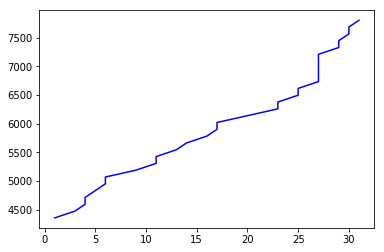

In [103]:
# evaluate the histogram
values, base = np.histogram(data_array[1], bins=30)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function

plt.plot(cumulative, base[:-1], c='blue')

plt.show()